This is the Python code is based on the examples in Chapter 3 of the book:

FIBER-REINFORCED COMPOSITES
Materials, Manufacturing, and Design
by: P.K. Mallick (2008) by Taylor & Francis Group, LLC

and is discussed during the lecture on classical laminate theory in the course:

Composite and Lightweight Materials (4MM00)

at Eindhoven University of Technology

This code:
(C) Joris Remmers (2013-2023)

## Example 4 (Classical Laminate Theory)

Consider a fibre reinforced plastic that consists of uni-directional carbon fibres embedded in an epoxy matrix. 
The fibre volume fraction $V_f=0.6$. The properties of the transverse isoptric fibre are: $E_{\rm fL} = 220\,$GPa ; 
$E_{\rm fT} = 20\,$GPa ; $\nu_{\rm f} = 0.2$ ; $G_{\rm f} = 91.7\,$GPa.

The properties of the isotropic epoxy matrix are $E_{\rm m} = 3.6\,$GPa ; $\nu_{\rm f} = 0.35$ ; 
$G_{\rm f} = 1.33\,$GPa.

The resulting UD composite material is used in a laminate consisting of 8 layers with a
thickness $0.3\,$mm and stacking sequence $\lbrack 0,45,-45,90\rbrack_{\rm S}$, which is loaded by the following load: ${\bf N}=\lbrack 10 , 5 , 6\rbrack$ kN/m and ${\bf M}=\lbrack 3 , 10 , 1\rbrack$ Nm/m.

Calculate the stresses in material direction in each layer. Plot the results as a bar chart.

## Solution

In [9]:
from composite import TransverseIsotropic,mixMaterials

For this carbon fiber composite material, the carbon fibers and the epoxy matrix are modeled as separate transversely isotropic materials. The T-300 carbon fibers have Young's Moduli $E_1=220\,$GPa,  $E_2=22\,$GPa, a Poisson's ratio $\nu_{12}=0.2$ and a Shear Modulus $G_{12}=91.7\,$GPa. The epoxy matrix may be considered isotropic with Young's modulus $E=3.6\,$GPa, Poisson's ratio $\nu=0.35$ and Shear Modulus $G_{12}=1.33\,$GPa. 

In [10]:
carbon = TransverseIsotropic( [220e9,22e9],0.2,91.7e9)
epoxy  = TransverseIsotropic( 3.6e9,0.35,1.33e9)

The properties of carbon and epoxy are:

In [11]:
print(carbon)
print(epoxy)


  Elastic Properties:
  -----------------------------------------------------------
  E1     :     2.200e+11 , E2     :     2.200e+10 
  nu12   :          0.20 , G12    :     9.170e+10 

  Thermal expansion coefficients:
  -----------------------------------------------------------
  alpha1 :     0.000e+00 , alpha2 :     0.000e+00 


  Elastic Properties:
  -----------------------------------------------------------
  E1     :     3.600e+09 , E2     :     3.600e+09 
  nu12   :          0.35 , G12    :     1.330e+09 

  Thermal expansion coefficients:
  -----------------------------------------------------------
  alpha1 :     0.000e+00 , alpha2 :     0.000e+00 



The composite consists of 60\% fibres and 40\% epoxy. The properties of the composite can be calculated by simple homogensiation.

In [12]:
udcomp = mixMaterials( carbon , epoxy , 0.6 )
    

Calculate the $\bf{A},\bf{B}$ and ${\bf D}$ matrices for a given a laminate of UD material with a stacking sequence $\lbrack 0,45,-45,90\rbrack_{\rm S}$. Each layer has a thickness of $0.3$\,mm.

In [13]:
from composite import Laminate
lam = Laminate()

lam.addMaterial( 'UD' , udcomp )

orientations = [ 0. , 45. , -45. , 90 , 90 , -45. , 45. , 0. ]

In [14]:
for angle in orientations:
  lam.addLayer( 'UD' , angle , 0.25e-3 )
    
print ("\nA matrix:\n",lam.getA())
print ("\nB matrix:\n",lam.getB())
print ("\nD matrix:\n",lam.getD())


A matrix:
 [[1.10084410e+08 3.48701806e+07 0.00000000e+00]
 [3.48701806e+07 1.10084410e+08 3.72529030e-09]
 [0.00000000e+00 3.72529030e-09 3.76071147e+07]]

B matrix:
 [[-3.63797881e-12 -4.54747351e-13  0.00000000e+00]
 [-4.54747351e-13  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  3.41060513e-13]]

D matrix:
 [[62.39049693  9.67972416  3.95867071]
 [ 9.67972416 14.88644841  3.95867071]
 [ 3.95867071  3.95867071 10.59203554]]


Calculate the stresses in each layer (expressed in the material coordinate system) of the laminate for the following load: ${\bf N}=\lbrack 10 , 5 , 6\rbrack$ kN/m and ${\bf M}=\lbrack 3 , 10 , 1\rbrack$ Nm/m.

First, calculate the inverse matrices

In [15]:
A1,B1,C1,D1 = lam.getInverseMatrices()

Calculate the midplane strain $\boldsymbol{\epsilon}^0$ and curvatures $\boldsymbol{\kappa}$ according to:
\begin{equation}
  \boldsymbol{\epsilon}^0 = {\bf A}_1 {\bf N} + {\bf B}_1{\bf M}
\end{equation} 
\begin{equation}
  \boldsymbol{\kappa} = {\bf C}_1 {\bf N} + {\bf D}_1{\bf M}
\end{equation}

In [16]:
import numpy as np

N = np.array([1.0e4, 5.0e3, 6.0e3 ])
M = np.array([3.   , 10.  , 1.    ])

eps0  = np.dot( A1 , N ) + np.dot( B1 , M )
kappa = np.dot( C1 , N ) + np.dot( D1 , M )

print("The midplane strains are : ",eps0)
print("The curvatures are       : ",kappa)

The midplane strains are :  [8.49787329e-05 1.85019499e-05 1.59544279e-04]
The curvatures are       :  [-0.05835077  0.7536957  -0.16546788]


For each layer $j$, the strain can be calculated by:
\begin{equation}
  \boldsymbol{\epsilon}_j = \boldsymbol{\epsilon}^0 + z_j\boldsymbol{\kappa}
\end{equation}
The stresses in layer $j$ in the global coordinate system are
\begin{equation}
  \boldsymbol{\sigma}_j = {\bf \bar Q}_j\boldsymbol{\epsilon}
\end{equation}
These stresses need to be transformed to material frame of reference.

In [22]:
from composite import stressTransformation

sigmaplt = []

for iLay,angle in enumerate(orientations):
  epsilon = eps0 + lam.getZcoord( iLay ) * kappa
  sigma   = np.dot( lam.getQbar(iLay) , epsilon )
  sigmaplt.append(stressTransformation( sigma , angle ))

The results are stored in the list sigmaplt and can be plotted as a bar chart by means of the following matplotlib code.

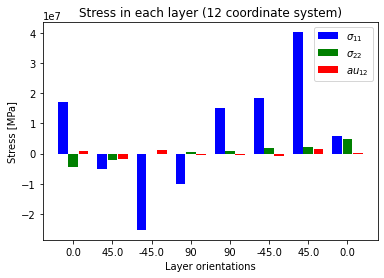

In [23]:
import matplotlib.pyplot as plt

X = np.arange(8)
fig = plt.figure()

plt.bar(X - 0.26, [s[0] for s in sigmaplt] , color = 'b', width = 0.25, label = "$\sigma_{11}$")
plt.bar(X       , [s[1] for s in sigmaplt] , color = 'g', width = 0.25, label = "$\sigma_{22}$")
plt.bar(X + 0.26, [s[2] for s in sigmaplt] , color = 'r', width = 0.25, label = "$\tau_{12}$")

plt.xticks(X, orientations)

plt.xlabel("Layer orientations")
plt.ylabel("Stress [MPa]")
plt.title("Stress in each layer (12 coordinate system)")

plt.legend()
plt.show()